# Tensorflow 기초

tpu: 구글에서 만든 머신러닝 전용 하드웨어

In [2]:
try:
  %tensorflow_version 2.x 
  # %는 매직 커맨드라고 한다. -> 미리 정해놓은 명령어 그대로 사용 시 사용
except Exception:
  pass
import tensorflow as tf
print(tf.__version__) # tensorflow 버전 확인

2.4.1


In [3]:
#난수는 매우 중요! -> 이유는 신경망을 쉽게 보면 많은 숫자로 구성된 행렬이다.
# 어느 정도 규칙성이 있는 범위 내에서 난수를 지정! -> Xavier 초기화, He 초기화 방식! -> 매우 중요!
rand = tf.random.uniform([5],0,1) 
# 0과 1사이에 값 -> 5개
print(rand)

tf.Tensor([0.61697197 0.12125182 0.43479085 0.6122782  0.5553787 ], shape=(5,), dtype=float32)


In [4]:
rand = tf.random.uniform([5,3],0,1) 
# 0과 1사이에 값 -> 3개짜리 5줄(5*3)
print(rand)

tf.Tensor(
[[4.6277523e-01 7.1595562e-01 2.6034904e-01]
 [9.6647263e-02 8.7789798e-01 1.1301041e-04]
 [7.5194120e-01 4.1348064e-01 2.7183723e-01]
 [6.0190046e-01 7.8972661e-01 8.4755301e-02]
 [1.9566178e-02 8.0030107e-01 4.8802710e-01]], shape=(5, 3), dtype=float32)


In [5]:
rand = tf.random.uniform([5,3,1],0,1) 
# 0과 1사이에 값 -> 3개짜리 5줄(5*3)
print(rand)

tf.Tensor(
[[[0.64059246]
  [0.77000034]
  [0.2707882 ]]

 [[0.8467921 ]
  [0.0336163 ]
  [0.23474312]]

 [[0.1992321 ]
  [0.07754326]
  [0.9715388 ]]

 [[0.89883757]
  [0.9996449 ]
  [0.23048544]]

 [[0.70090246]
  [0.744416  ]
  [0.9009876 ]]], shape=(5, 3, 1), dtype=float32)


정규 분포

In [ ]:
rand = tf.random.normal([4,10],0,1) # 두 번째의 0은 정규 분포의 평균, 세 번째의 1은 정규분포의 표준편차
#-> 이런 정규분포가 표준정규분포
print(rand)
# 1이상의 값도 나오고 음수도 나온다.

시그모이드 함수

In [6]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [7]:
x = 1
y=0
w=tf.random.normal([1],0,1)
output=sigmoid(x*w) # 입력값과 가중치 곱한것이 입력값
print(output) # 0과의 편차가 크다

0.48024288506690765


실제 출력값과 기대 출력값과의 차이를 error라고 한다.

-> 에러가 0에 가깝게 하기 위해서는 w를 변화시킨다.
-> 경사하강법 사용!

**경사 하강법**

In [8]:
#경사하강법
# w=w(기존의 가중치)+x*a(학습률)*error -> (새로운 가중치 갱신)
a=0.1 # 학습률
for i in range(1000):
  output = sigmoid(x*w)
  error=y-output
  w=w+x*a*error # 가중치+입력값*학습률*error -> 가중치 갱신

  if i%100==99: # 0과의 편차가 작아졌다.
    print("반복횟수 {0} : , 에러값 : {1}, 결과값 : {2}".format(i,error,output))

반복횟수 99 : , 에러값 : -0.10051833772478587, 결과값 : 0.10051833772478587
반복횟수 199 : , 에러값 : -0.05189981606023879, 결과값 : 0.05189981606023879
반복횟수 299 : , 에러값 : -0.03464299808705999, 결과값 : 0.03464299808705999
반복횟수 399 : , 에러값 : -0.025919323090474334, 결과값 : 0.025919323090474334
반복횟수 499 : , 에러값 : -0.020677708912672767, 결과값 : 0.020677708912672767
반복횟수 599 : , 에러값 : -0.017187426589828195, 결과값 : 0.017187426589828195
반복횟수 699 : , 에러값 : -0.014699206364722852, 결과값 : 0.014699206364722852
반복횟수 799 : , 에러값 : -0.01283689122051881, 결과값 : 0.01283689122051881
반복횟수 899 : , 에러값 : -0.01139137709956955, 결과값 : 0.01139137709956955
반복횟수 999 : , 에러값 : -0.010237193292834538, 결과값 : 0.010237193292834538


In [9]:
x=0
y=1
a=0.1 # 학습률

for i in range(1000):
  output = sigmoid(x*w)
  error=y-output
  w=w+x*a*error

  if i%100==99: # 결과값 1(y=1로 했으므로)을 기대했지만 진전이 되지 않음을 보임 -> 문제 해결 X
    print("반복횟수 {0} : , 에러값 : {1}, 결과값 : {2}".format(i,error,output))
    #이유는 x=0이 되면 가중치가 갱신되지 않는다! -> 그래서 편향이 등장

반복횟수 99 : , 에러값 : 0.5, 결과값 : 0.5
반복횟수 199 : , 에러값 : 0.5, 결과값 : 0.5
반복횟수 299 : , 에러값 : 0.5, 결과값 : 0.5
반복횟수 399 : , 에러값 : 0.5, 결과값 : 0.5
반복횟수 499 : , 에러값 : 0.5, 결과값 : 0.5
반복횟수 599 : , 에러값 : 0.5, 결과값 : 0.5
반복횟수 699 : , 에러값 : 0.5, 결과값 : 0.5
반복횟수 799 : , 에러값 : 0.5, 결과값 : 0.5
반복횟수 899 : , 에러값 : 0.5, 결과값 : 0.5
반복횟수 999 : , 에러값 : 0.5, 결과값 : 0.5


In [10]:
x=0
y=1
w=tf.random.normal([1],0,1)
b=tf.random.normal([1],0,1)
a=0.1

for i in range(1000):
  output=sigmoid(x*w+1*b)#편향값을 추가
  error=y-output
  w=w+x*a*error
  b=b+1*a*error #편향값도 갱신 
  if i%100==99: #편향값을 넣으니 진전이 있다.
    print("반복횟수 {0} : , 에러값 : {1}, 결과값 : {2}".format(i,error,output))


반복횟수 99 : , 에러값 : 0.05453346069757725, 결과값 : 0.9454665393024227
반복횟수 199 : , 에러값 : 0.035818601057826416, 결과값 : 0.9641813989421736
반복횟수 299 : , 에러값 : 0.02657773210052905, 결과값 : 0.973422267899471
반복횟수 399 : , 에러값 : 0.02109685178132048, 결과값 : 0.9789031482186795
반복횟수 499 : , 에러값 : 0.01747704566519448, 결과값 : 0.9825229543348055
반복횟수 599 : , 에러값 : 0.014911055690392305, 결과값 : 0.9850889443096077
반복횟수 699 : , 에러값 : 0.012998509591397478, 결과값 : 0.9870014904086025
반복횟수 799 : , 에러값 : 0.011518687941793782, 결과값 : 0.9884813120582062
반복횟수 899 : , 에러값 : 0.010340017657445078, 결과값 : 0.9896599823425549
반복횟수 999 : , 에러값 : 0.009379276244750323, 결과값 : 0.9906207237552497


AND 연산

In [11]:
#편향은 보통 한개만 사용!
import numpy as np

x=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([[1],[0],[0],[0]])
w=tf.random.normal([2],0,1) #가중치
b=tf.random.normal([1],0,1) #bias
b_x=1

for i in range(2000):
  error_sum=0
  for j in range(4): #x에 4번이 들어가므로 4번 돌림
    output=sigmoid(np.sum(x[j]*w)+b_x*b)
    error=y[j][0]-output
    w=w+x[j]*0.1*error
    b=b+b_x*0.1*error
    error_sum+=error
  
  if i%200==199:
    print(i,error_sum)

199 -0.10795631641749372
399 -0.06486860787107743
599 -0.04624716171264688
799 -0.03582895844048545
999 -0.029189363210854937
1199 -0.024597402005797644
1399 -0.021238489913115492
1599 -0.01867674416722808
1799 -0.016660121896869922
1999 -0.015031830454514502


In [12]:
for i in range(4):
  print('X: ',x[i], 'Y : ',y[i],'Output: ',sigmoid(np.sum(x[i]*w)+b))
  # 기대값에 얼마나 가까운지 확인

X:  [1 1] Y :  [1] Output:  0.9649063422978671
X:  [1 0] Y :  [0] Output:  0.024868876899354846
X:  [0 1] Y :  [0] Output:  0.024944846301737413
X:  [0 0] Y :  [0] Output:  2.3728920107137806e-05


마지막 값과 같이 가수와 지수로 표현하면 매우 작은 수!

OR 연산

In [13]:
import numpy as np
# OR연산자
x=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([[1],[1],[1],[0]])
#파라미터 초기화 과정
w=tf.random.normal([2],0,1) #가중치
b=tf.random.normal([1],0,1) #bias
b_x=1

#하이퍼파라미터
a=0.1
for i in range(2000):
  error_sum=0
  for j in range(4): #x에 4번이 들어가므로 4번 돌림
    output=sigmoid(np.sum(x[j]*w)+b_x*b)
    error=y[j][0]-output
    w=w+x[j]*a*error
    b=b+b_x*a*error
    error_sum+=error
  
  if i%200==199:
    print(i,error)



199 -0.26015292400146095
399 -0.13527222153896082
599 -0.09002752125089593
799 -0.06710319617851829
999 -0.05335430984109999
1199 -0.04422420875655687
1399 -0.03773328642787094
1599 -0.03288789220739242
1799 -0.02913554468254859
1999 -0.026145678888696035


In [14]:
for i in range(4):
  print('X: ',x[i], 'Y : ',y[i],'Output: ',sigmoid(np.sum(x[i]*w)+b))
  # 기대값에 얼마나 가까운지 확인

X:  [1 1] Y :  [1] Output:  0.9999970190332783
X:  [1 0] Y :  [1] Output:  0.9895695809896585
X:  [0 1] Y :  [1] Output:  0.9895487020295278
X:  [0 0] Y :  [0] Output:  0.026079190731224236


XOR연산

In [15]:
import numpy as np
# XOR연산자
x=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([[0],[1],[1],[0]])
#파라미터 초기화 과정
w=tf.random.normal([2],0,1) #가중치
b=tf.random.normal([1],0,1) #bias
b_x=1

#하이퍼파라미터
a=0.1
for i in range(2000):
  error_sum=0
  for j in range(4): #x에 4번이 들어가므로 4번 돌림
    output=sigmoid(np.sum(x[j]*w)+b_x*b)
    error=y[j][0]-output
    w=w+x[j]*a*error
    b=b+b_x*a*error
    error_sum+=error
  
  if i%200==199:
    print(i,error)



199 -0.5169150330610937
399 -0.5129842355962375
599 -0.51282440424159
799 -0.5128179069536571
999 -0.5128176417011571
1199 -0.5128176323940516
1399 -0.5128176323940516
1599 -0.5128176323940516
1799 -0.5128176323940516
1999 -0.5128176323940516


In [16]:
#별로 좋은 결과가 아니다. -> 여러 개의 퍼셉트론을 사용해야 한다.
for i in range(4):
  print("X : ",x[i],"Y ; ",y[i],"Output : ",sigmoid(np.sum(x[i]*w)+b))

X :  [1 1] Y ;  [0] Output :  0.5128176286712095
X :  [1 0] Y ;  [1] Output :  0.5128176305326305
X :  [0 1] Y ;  [1] Output :  0.4999999990686774
X :  [0 0] Y ;  [0] Output :  0.5000000009313226


In [19]:
#3개의 퍼셉트론과 뉴런 사용
import numpy as np
import tensorflow as tf

x=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([[0],[1],[1],[0]])

#순차적 layer쌓기
#사진1-1: 전부 연결 방식
#Sequential 모델은 layer가 차례대로 정의한 리스트 전달
#Dense는 model에서 사용하는 레이어를 정의하는 명령
#input_shape은 입력의 차원 수 정의(1차원의 원소 2개)
model = tf.keras.Sequential([tf.keras.layers.Dense(units=2,activation='sigmoid',input_shape=(2,)),
                             tf.keras.layers.Dense(units=1,activation='sigmoid')])
#얼마로 데이터가 들어오는지를 input_shape으로 말함
#units 2개와 1개를 썼는데 마지막 layer는 units이 중요한데 신경망 결과를 몇 개 출력할 건지 말해야하는데 결과값 1개를 출력할 것이므로
#units=1이다.(레이어를 구성하는 뉴런의 수를 정의) 
#-> 총 2개 layer구축

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3),loss='mse')
#최적화 방식 -> SGD(확률적경사하강법(확률적으로 일부 샘플을 구해서 조금씩 나눠서 계산하겠다는 뜻) -> 학습률 0.3) -> 평가지표 mse
model.summary()
#퍼셉트론 몇개 쓸껀지 output shape에서 none아닌 것으로 말함
#param 개수 -> weight와 bias가 모두 합쳐진 값
#trainable params: 학습가능한 파라미터
#Non-trainable params: 학습 불가능한 파라미터 
#입력으로 인한 input4개 + bias2개 -> 6개 : 첫번째 layer
#2번째 layer: input 2개 + bias 1개 -> 3개

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(x,y,epochs=2000,batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2636
Epoch 2/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2826
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2748
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2648
Epoch 5/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2473
Epoch 6/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2669
Epoch 7/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2609
Epoch 8/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2662
Epoch 9/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2489
Epoch 11/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2597
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2584
Epoch 13/2000
4/4 [==============================

In [23]:
model.predict(x)

array([[0.04639077],
       [0.9530511 ],
       [0.95310986],
       [0.03943548]], dtype=float32)

In [24]:
# 잘 나온 것을 확인했지만 왜 잘 나온지 확인을 위해서 모델 구성하는 파라미터, 가중치 ,편향 출력
for weight in model.weights:
  print(weight)
#첫 번째 줄이 입력 or 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용되는 가중치 kernel
#편향과 연결된 가중치는 bias

<tf.Variable 'dense_2/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.849831,  4.062815],
       [-5.871301,  4.066761]], dtype=float32)>
<tf.Variable 'dense_2/bias:0' shape=(2,) dtype=float32, numpy=array([ 2.1715972, -6.3203917], dtype=float32)>
<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-7.9727726],
       [-8.148003 ]], dtype=float32)>
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([3.9786954], dtype=float32)>


측정치 변화량을 나타내는 선 그래프(정확도 측정을 위한 방법)

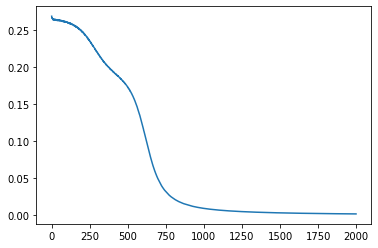

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.show()
#네트워크 학습 현황을 한눈에 파악 가능하다.